In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import PIL.Image as Image # image library in Python
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")


In [4]:
from tensorflow.keras.layers import Dense

In [97]:
IMAGE_SHAPE = (224, 224)
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2")
])
#m.build([None, 224, 224, 3])  # Batch input shape.

In [98]:
#IMAGE_SHAPE = (224, 224)

In [99]:
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=IMAGE_SHAPE + (3,))
])


In [100]:
'''
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(m, input_shape=IMAGE_SHAPE + (3,))
])
'''

'\nclassifier = tf.keras.Sequential([\n    tf.keras.layers.Dense(m, input_shape=IMAGE_SHAPE + (3,))\n])\n'

In [101]:
'''
IMAGE_SHAPE = (224, 224)
#model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4"
model_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2"

classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(model_url, input_shape=IMAGE_SHAPE + (3,))
])
'''

'\nIMAGE_SHAPE = (224, 224)\n#model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4"\nmodel_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2"\n\nclassifier = tf.keras.Sequential([\n    tf.keras.layers.Dense(model_url, input_shape=IMAGE_SHAPE + (3,))\n])\n'

In [102]:
'''
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2", input_shape=IMAGE_SHAPE+(3,))
])
'''

'\nIMAGE_SHAPE = (224,224)\nclassifier = tf.keras.Sequential([\n    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2", input_shape=IMAGE_SHAPE+(3,))\n])\n'

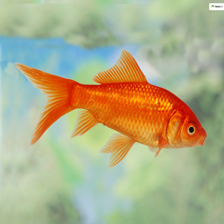

In [103]:
gold_fish = Image.open("goldfisch.jpg").resize(IMAGE_SHAPE)
gold_fish

In [104]:
gold_fish =np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [105]:
gold_fish


array([[[0.76078431, 0.81568627, 0.69019608],
        [0.75686275, 0.81176471, 0.68235294],
        [0.75294118, 0.80784314, 0.6745098 ],
        ...,
        [0.66666667, 0.70980392, 0.61960784],
        [0.66666667, 0.70980392, 0.62352941],
        [0.67058824, 0.70980392, 0.62745098]],

       [[0.76078431, 0.81568627, 0.68627451],
        [0.75294118, 0.81176471, 0.67843137],
        [0.74901961, 0.81176471, 0.66666667],
        ...,
        [0.6627451 , 0.70980392, 0.61176471],
        [0.66666667, 0.70980392, 0.61568627],
        [0.67058824, 0.70980392, 0.62352941]],

       [[0.75686275, 0.81568627, 0.68235294],
        [0.75294118, 0.81176471, 0.6745098 ],
        [0.74509804, 0.81176471, 0.66666667],
        ...,
        [0.65490196, 0.70588235, 0.60392157],
        [0.65882353, 0.70588235, 0.60392157],
        [0.66666667, 0.70980392, 0.61176471]],

       ...,

       [[0.67843137, 0.74117647, 0.59607843],
        [0.67843137, 0.74117647, 0.59607843],
        [0.67843137, 0

In [106]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [107]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
result= classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 83ms/step


(1, 224, 224, 64)

In [109]:
result

array([[[[2.4961782e-01, 2.6978627e-01, 0.0000000e+00, ...,
          0.0000000e+00, 8.9971256e-03, 2.6097488e-01],
         [2.4712589e-01, 2.6909918e-01, 0.0000000e+00, ...,
          0.0000000e+00, 8.9919697e-03, 2.6070011e-01],
         [2.4463399e-01, 2.6841202e-01, 0.0000000e+00, ...,
          0.0000000e+00, 8.9868205e-03, 2.6042536e-01],
         ...,
         [2.2310337e-01, 2.3321593e-01, 0.0000000e+00, ...,
          0.0000000e+00, 8.1481552e-03, 2.2392558e-01],
         [2.2419299e-01, 2.3262176e-01, 0.0000000e+00, ...,
          0.0000000e+00, 8.0840914e-03, 2.2301517e-01],
         [2.2579616e-01, 2.3315164e-01, 0.0000000e+00, ...,
          0.0000000e+00, 8.5521927e-03, 2.2315250e-01]],

        [[2.4852818e-01, 2.7038044e-01, 0.0000000e+00, ...,
          0.0000000e+00, 9.0611894e-03, 2.6188526e-01],
         [2.4552272e-01, 2.6856926e-01, 0.0000000e+00, ...,
          0.0000000e+00, 8.5238749e-03, 2.6056278e-01],
         [2.4174030e-01, 2.6922771e-01, 5.2665378e-05, .

In [110]:
predicted_label_index = np.argmax(result)
predicted_label_index 

70825

In [111]:
with open ("labels.txt", "r") as f:
    image_labels=f.read().splitlines()
image_labels[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

In [112]:
image_labels

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tr

In [113]:
# Suppose que la liste image_labels a une longueur de 10
predicted_label_index = 3  # Utilisez un index valide ici

try:
    label = image_labels[predicted_label_index]
    print(f"Label prédit : {label}")
except IndexError:
    print("L'index est en dehors de la plage valide.")


Label prédit : great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias


In [114]:
image_labels[predicted_label_index]

'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias'

In [115]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, cache_dir=".", untar=True)

In [116]:
data_dir 

'.\\datasets\\flower_photos'

In [117]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [118]:
image_count =len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [119]:
roses = list(data_dir.glob("roses/*"))
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [120]:
import PIL 
from PIL import Image

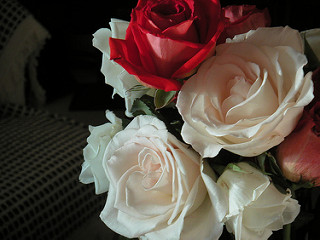

In [121]:
PIL.Image.open(str(roses[1]))

In [122]:
flowers_images_dict = {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*")),
}

In [123]:
flowers_labels_dict ={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4,
    
}

In [124]:
str(flowers_images_dict["roses"][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [125]:
img =cv2.imread(str(flowers_images_dict["roses"][0]))
img.shape

(240, 179, 3)

In [126]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [127]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [128]:
X,y = [],[]

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [129]:
X=np.array(X)
y = np.array(y)


In [130]:
import numpy as np

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)


In [132]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train_scaled= X_train / 255
X_test_scaled= X_test / 255

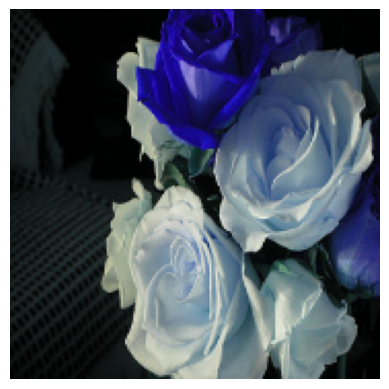

In [133]:
plt.axis("off")
plt.imshow(X[1])

In [134]:
#predicted =classifier.predict(np.array([X[0],X[1],X[2]]))
predicted =classifier.predict(np.array(X[0]))

ValueError: in user code:

    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 180, 3)


In [135]:
feature_extractor_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-feature-vector/2"
pretrained_model_withour_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False)


In [137]:
num_of_flyers = 3
model = tf.keras.Sequential(
    [pretrained_model_withour_top_layer, 
     tf.keras.layers.Dense(num_of_flyers)]
)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1280)              410208    
                                                                 
 dense_10 (Dense)            (None, 3)                 3843      
                                                                 
Total params: 414,051
Trainable params: 3,843
Non-trainable params: 410,208
_________________________________________________________________


In [139]:
model.compile(optimizer="adam",
              loss =keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2


ValueError: in user code:

    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\panla\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 180, 180, 3)
